In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataekp_0.csv')
df

,section,subsection,title,description,start,stop,address,participants
0,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-01-18,2008-01-20,"Россия, Тульская обл. Алексин",40.0
1,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-08,2008-02-10,"Россия, Приморский край Владивосток",30.0
2,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-02-22,2008-02-24,"Россия, Тульская обл. Алексин",50.0
3,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-22,2008-02-24,"Россия, Свердловская обл. Екатеринбург",100.0
4,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-03-01,2008-03-02,"Россия, Пермская обл. Пермь",40.0
...,...,...,...,...,...,...,...,...
76596,Эстетическая гимнастика,Молодежный (резервный) состав,Первенство россии,-,2015-04-15,2015-04-20,"Россия, Московская обл. Раменское, -",380.0
76597,Эстетическая гимнастика,Молодежный (резервный) состав,Кубок мира,- этап,2015-04-24,2015-04-27,"Финляндия, -, -",50.0
76598,Эстетическая гимнастика,Молодежный (резервный) состав,Первенство мира,-,2015-06-04,2015-06-08,"Фарерские острова, -, -",40.0
76599,Эстетическая гимнастика,Молодежный (резервный) состав,Тренировочное мероприятие,-,2015-08-15,2015-08-25,"Россия, Нижегородская обл. Павлово, -",150.0


In [41]:
section_1 = df[df.section == 'Авиамодельный спорт']
section_2 = df[df.section == 'Эстетическая гимнастика']

In [9]:
section_1.start

0        2008-01-18
1        2008-02-08
2        2008-02-22
3        2008-02-22
4        2008-03-01
            ...    
65280    2015-08-06
65281    2015-08-10
65282    2015-08-20
65283    2015-08-20
65284    2015-09-18
Name: start, Length: 1206, dtype: object

In [10]:
section_2.start

15645    2009-02-12
15646    2009-02-19
15647    2009-03-01
15648    2009-03-21
15649    2009-03-27
            ...    
76596    2015-04-15
76597    2015-04-24
76598    2015-06-04
76599    2015-08-15
76600    2015-12-03
Name: start, Length: 172, dtype: object

In [48]:
date1 = pd.to_datetime(section_1.start).dt.year
date2 = pd.to_datetime(section_2.start).dt.year

In [49]:
date1

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
65280    2015
65281    2015
65282    2015
65283    2015
65284    2015
Name: start, Length: 1206, dtype: int64

In [50]:
part1 = section_1.participants
part2 = section_2.participants

In [51]:
part1

0         40.0
1         30.0
2         50.0
3        100.0
4         40.0
         ...  
65280      2.0
65281     13.0
65282     50.0
65283      9.0
65284     16.0
Name: participants, Length: 1206, dtype: float64

In [53]:
df1 = pd.concat([date1, part1], axis=1, join='inner')
df2 = pd.concat([date2, part2], axis=1, join='inner')

In [57]:
pivot1 = df1.pivot_table(index=['start'], values='participants', aggfunc='sum')
pivot2 = df2.pivot_table(index=['start'], values='participants', aggfunc='sum')

In [58]:
pivot2

,participants
start,
2009,4054.0
2010,3555.0
2011,5221.0
2012,5200.0
2013,5975.0
2014,7795.0
2015,8215.0


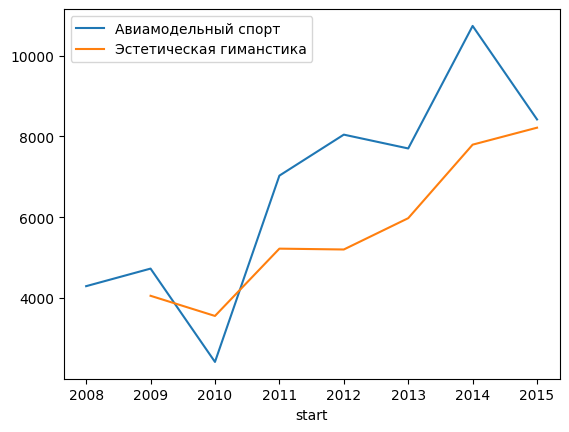

In [65]:
ax = pivot1.plot()
pivot2.plot(ax=ax)
plt.legend(['Авиамодельный спорт', 'Эстетическая гиманстика'])

Гимнастки почти сравнялись по популярности с авиамоделями :)
Ссылка на набор данных: https://data.gov.ru/opendata/7703771271-ekp